# Student Performance vs Funding

#### Data sources: https://www.kaggle.com/noriuk/us-educational-finances?select=states.csv

### Import Dependencies and Setup for the analyze

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import warnings

# Study data files paths
average_scores_path = "Input_Data/naep.csv"
fed_revenue_path = "Input_Data/states.csv"

# Read the score data and the revenue results
scores_data = pd.read_csv(average_scores_path)
revenue_data = pd.read_csv(fed_revenue_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(scores_data, revenue_data, how = "inner", \
                          left_on=['STATE','YEAR'], right_on=['STATE', 'YEAR'])

# Display the data table for preview
merged_data_df


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,2015,Alabama,230.9774227,Mathematics,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
2,2015,Alabama,217.0490898,Reading,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
3,2015,Alabama,258.7537615,Reading,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,1994,Virginia,213.4572859,Reading,4,1044721.0,6125739,372866,2399644,3353229,6276362,3271356,1883438,314439.0,587495
2036,1994,Washington,212.6953858,Reading,4,915952.0,5739012,327784,3978265,1432963,5968590,2918426,1741684,252127.0,840257
2037,1994,West Virginia,213.1469347,Reading,4,313750.0,1854403,147289,1185501,521613,1843973,1051169,507996,116579.0,151404
2038,1994,Wisconsin,224.1745453,Reading,4,843747.0,5682439,238786,2363863,3079790,5860230,3257526,1689034,193556.0,504767


In [2]:
# Group merged data by the test subject
test_subject = merged_data_df.groupby(['TEST_SUBJECT'])
# test_subject.head()


### Reveune and Spending analysis

In [3]:
# 2015 Total Reveune and Instructional Spending
warnings.filterwarnings('ignore')

year_2015 = merged_data_df[(merged_data_df['YEAR'] == 2015)]
year_2015["AVG_SCORE"] = year_2015["AVG_SCORE"].astype(float)
# year_2015.head()

year_2015 = year_2015.drop(columns=['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', \
                              'TOTAL_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', \
                             'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE'])

year_2015 = year_2015.rename(columns = {"YEAR": "Year", "STATE": "State", "AVG_SCORE": "Avg Score", \
                                        "TEST_SUBJECT": "Subject", "TEST_YEAR":"Grade", \
                                        "ENROLL":"Enrollment", \
                                        "TOTAL_REVENUE": "Total funding revenue", \
                                        "INSTRUCTION_EXPENDITURE": "Instruction expenditure"})

year_2015.head()

,Year,State,Avg Score,Subject,Grade,Enrollment,Total funding revenue,Instruction expenditure
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610


In [4]:
# Statistics for total funding revenue
total_rev = year_2015["Total funding revenue"].agg(['mean', 'median', 'var', 'std', 'sem'])
total_rev

mean      1.281705e+07
median    7.548871e+06
var       2.436156e+14
std       1.560819e+07
sem       1.092792e+06
Name: Total funding revenue, dtype: float64

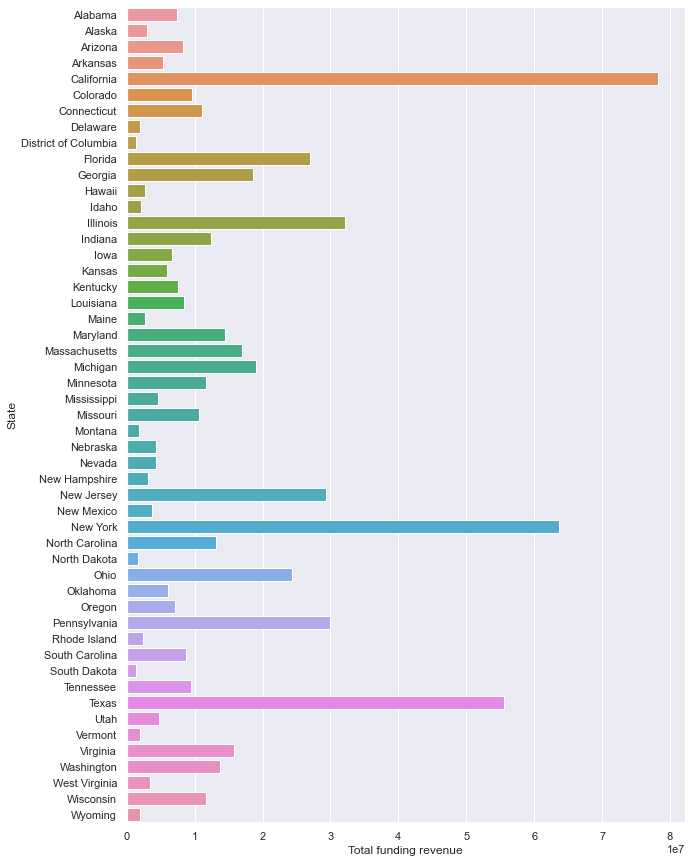

In [5]:
# Total funding revenue by State in 2015, presenting in barplot

sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (10, 15))
 
sns.barplot(x = "Total funding revenue", y ='State', data = year_2015, ax = ax)
ax.set(xlabel = "Total funding revenue") 

plt.savefig("Output_images/Total_rev_State.png")

In [6]:
# Calculate the Total funding revenue per Student for 2015
# Note: The total revenue is the same regardless the grade or subject

revenue_per_student = round((year_2015["Total funding revenue"]*1000)/year_2015["Enrollment"],2)
# revenue_per_student.head()

year_2015["Total funding revenue per student"] = revenue_per_student
# year_2015.head()

In [7]:
# Calculate the Instruction spending per Student for 2015
# Note: The instruction expenditure is the same regardless the grade or subject

spending_per_student = round((year_2015["Instruction expenditure"]*1000)/year_2015["Enrollment"],2)
# spending_per_student.head()

year_2015["Instruction expenditure per student"] = spending_per_student
# year_2015.head()

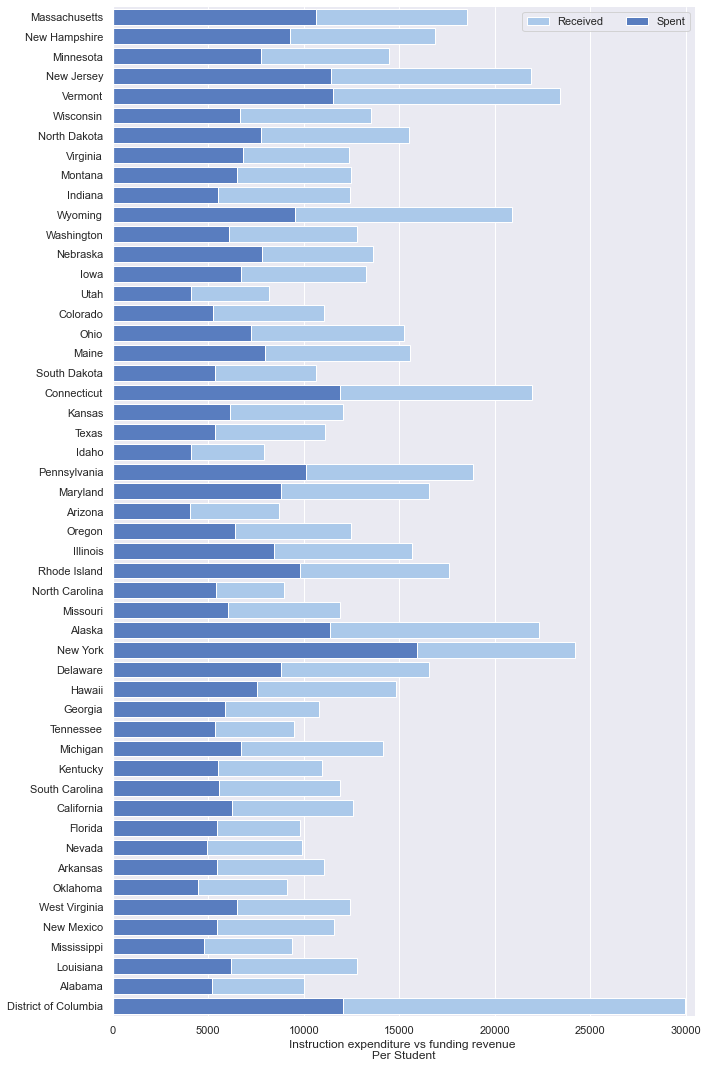

In [8]:
# Total revenue vs Instruction expenditure per student, sorted by Avg score

avg_score_sort = year_2015.sort_values("Avg Score", ascending = False)

f, ax = plt.subplots(figsize = (10, 15))

sns.set_color_codes("pastel")
ax = sns.barplot(x = "Total funding revenue per student", y = "State", 
                 label = "Received", data = avg_score_sort, color = "b", ax = ax)


sns.set_color_codes("muted")
ax = sns.barplot(x = "Instruction expenditure per student", y = "State", 
                 label = "Spent", data = avg_score_sort, color = "b", ax = ax)

handles, labels = ax.get_legend_handles_labels()

ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(xlim = (0, 30500), ylabel = "",
       xlabel = "Instruction expenditure vs funding revenue \nPer Student")


sns.despine(bottom = True)
plt.tight_layout(h_pad = 1)

plt.savefig("Output_images/Rev_Exp_Per_student.png")

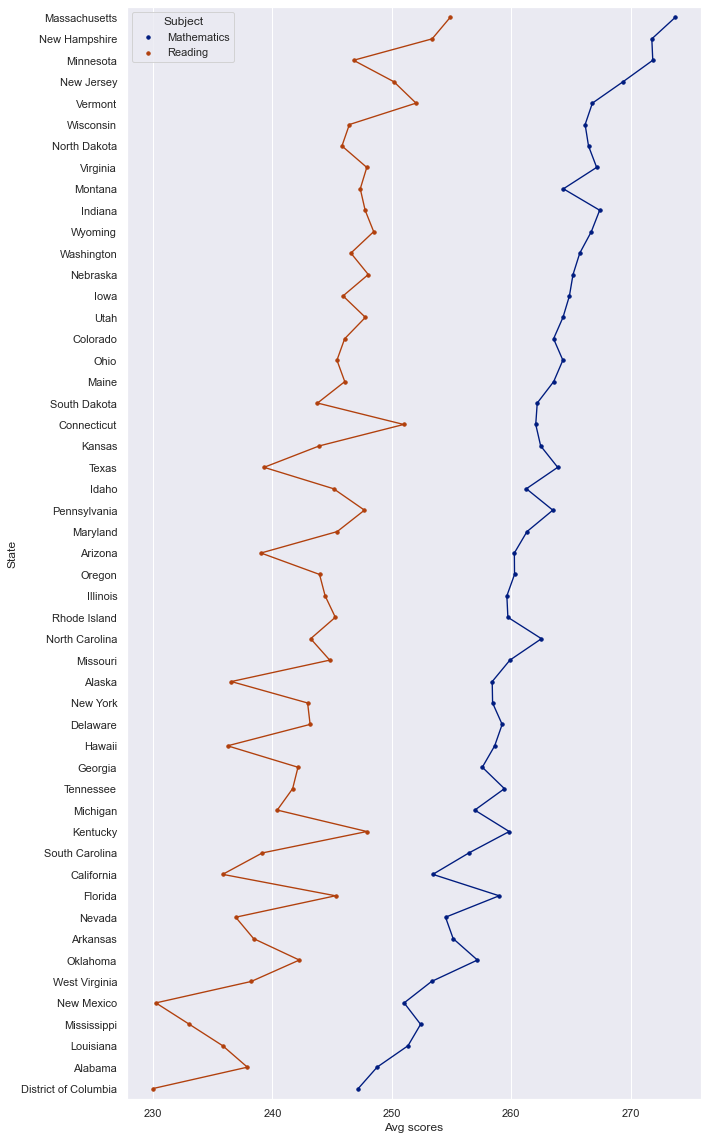

In [9]:
# Barplot to show the Avg scores in each State in 2015, sorted by Avg score
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize=(10, 16))
              
sns.pointplot(x ='Avg Score', y ='State', data = avg_score_sort, hue = "Subject", 
              palette = "dark", markers = "o", scale=.5, ci = None)

ax.set(xlabel = "Avg scores")
plt.tight_layout()

plt.savefig("Output_images/Average_Scores.png")

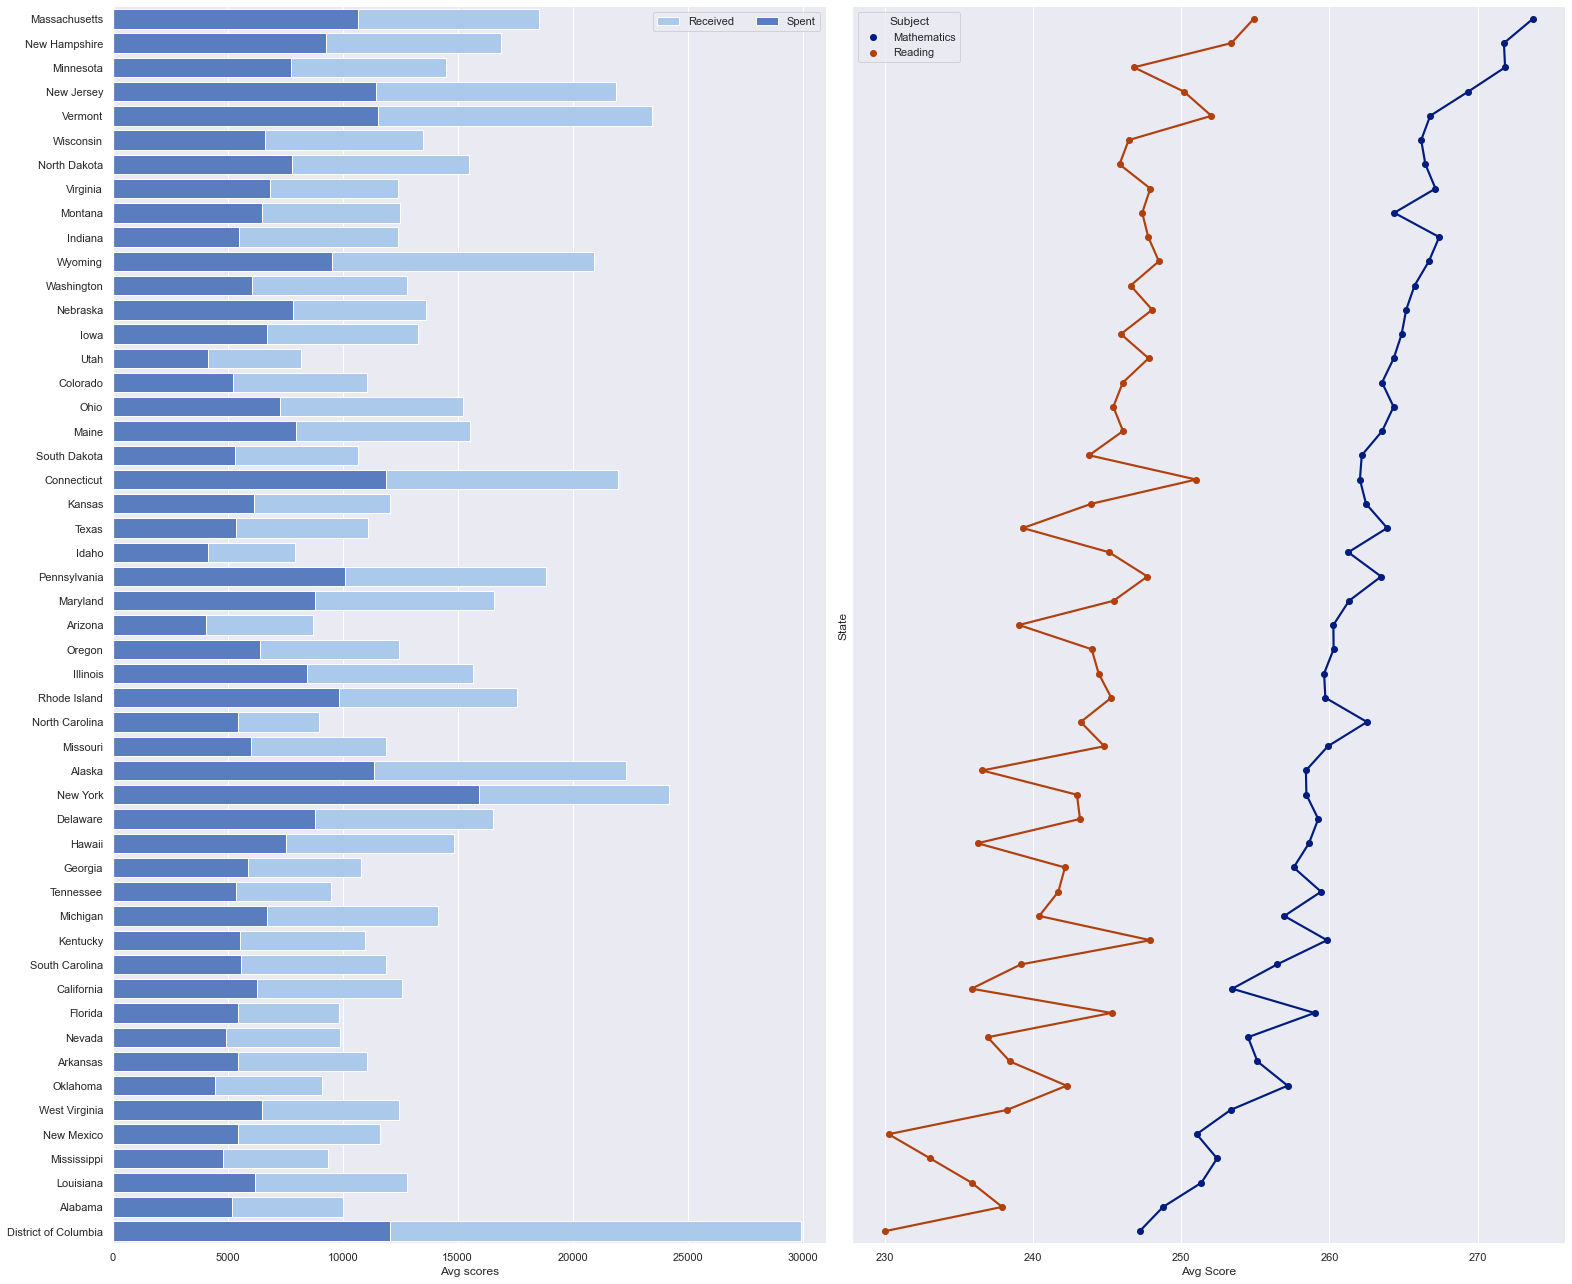

In [10]:
# Combined the two plots above
# Total revenue vs Instruction Expenditures per student, sorted by Avg score

avg_score_sort = year_2015.sort_values("Avg Score", ascending = False)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (22, 18), sharey = True)

sns.set_color_codes("pastel")
ax = sns.barplot(x = "Total funding revenue per student", y = "State", 
                 label = "Received", data = avg_score_sort, color = "b", ax = ax1)


sns.set_color_codes("muted")
ax = sns.barplot(x = "Instruction expenditure per student", y = "State", 
                 label = "Spent", data = avg_score_sort, color = "b", ax = ax1)

handles, labels = ax.get_legend_handles_labels()

ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(xlim = (0, 31000), ylabel = "",
       xlabel = "Instruction expenditure vs funding revenue\nPer Student")

sns.pointplot(x ='Avg Score', y ='State', data = avg_score_sort, hue = "Subject", 
              palette = "dark", markers = "o", scale = .8, ci = None, ax = ax2)

ax.set(xlabel = "Avg scores")


sns.despine(bottom = True)
plt.tight_layout(h_pad = 1)

plt.savefig("Output_images/Rev_Exp_n_score.png")

#### Get the following dataframes:
* 2015 4th grade Math
* 2015 8th grade Math
* 2015 4th grade Reading
* 2015 8th grade Reading

In [11]:
# For 2015 4th grade Math data

math = year_2015[year_2015['Subject'] == 'Mathematics']

grade_4_math = math[math['Grade'] == 4]

# Covert the type of the Average scores
warnings.filterwarnings('ignore')
grade_4_math["Avg Score"] = grade_4_math["Avg Score"].astype(float)
grade_4_math.head()

,Year,State,Avg Score,Subject,Grade,Enrollment,Total funding revenue,Instruction expenditure,Total funding revenue per student,Instruction expenditure per student
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479,10014.26,5194.03
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610,22339.38,11354.14
8,2015,Arizona,237.611755,Mathematics,4,944978.0,8230507,3846357,8709.73,4070.31
12,2015,Arkansas,235.215470,Mathematics,4,479682.0,5308625,2620399,11066.97,5462.78
16,2015,California,231.549345,Mathematics,4,6226523.0,78248042,38951948,12566.89,6255.81


In [12]:
# For 2015 8th grade Math data

math = year_2015[year_2015['Subject'] == 'Mathematics']

grade_8_math = math[math['Grade'] == 8]

# Convert the type of the Average scores
grade_8_math["Avg Score"] = grade_8_math["Avg Score"].astype(float)
grade_8_math.head()

,Year,State,Avg Score,Subject,Grade,Enrollment,Total funding revenue,Instruction expenditure,Total funding revenue per student,Instruction expenditure per student
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479,10014.26,5194.03
5,2015,Alaska,280.493456,Mathematics,8,130755.0,2920986,1484610,22339.38,11354.14
9,2015,Arizona,282.919489,Mathematics,8,944978.0,8230507,3846357,8709.73,4070.31
13,2015,Arkansas,275.064756,Mathematics,8,479682.0,5308625,2620399,11066.97,5462.78
17,2015,California,275.324573,Mathematics,8,6226523.0,78248042,38951948,12566.89,6255.81


In [13]:
# For 2015 4th grade Reading data

reading = year_2015[year_2015['Subject'] == 'Reading']
# Math
grade_4_reading = reading[reading['Grade'] == 4]

# Convert the type of the Average scores
warnings.filterwarnings('ignore')
grade_4_reading["Avg Score"] = grade_4_reading["Avg Score"].astype(float)
grade_4_reading.head()

,Year,State,Avg Score,Subject,Grade,Enrollment,Total funding revenue,Instruction expenditure,Total funding revenue per student,Instruction expenditure per student
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479,10014.26,5194.03
6,2015,Alaska,212.792600,Reading,4,130755.0,2920986,1484610,22339.38,11354.14
10,2015,Arizona,215.311337,Reading,4,944978.0,8230507,3846357,8709.73,4070.31
14,2015,Arkansas,218.077496,Reading,4,479682.0,5308625,2620399,11066.97,5462.78
18,2015,California,212.677949,Reading,4,6226523.0,78248042,38951948,12566.89,6255.81


In [14]:
# For 2015 8th grade Reading data

reading = year_2015[year_2015['Subject'] == 'Reading']
# Math
grade_8_reading = reading[reading['Grade'] == 8]

# Convert the type of the Average scores
warnings.filterwarnings('ignore')
grade_8_reading["Avg Score"] = grade_8_reading["Avg Score"].astype(float)
grade_8_reading.head()

,Year,State,Avg Score,Subject,Grade,Enrollment,Total funding revenue,Instruction expenditure,Total funding revenue per student,Instruction expenditure per student
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479,10014.26,5194.03
7,2015,Alaska,260.317019,Reading,8,130755.0,2920986,1484610,22339.38,11354.14
11,2015,Arizona,262.769392,Reading,8,944978.0,8230507,3846357,8709.73,4070.31
15,2015,Arkansas,258.768268,Reading,8,479682.0,5308625,2620399,11066.97,5462.78
19,2015,California,258.986843,Reading,8,6226523.0,78248042,38951948,12566.89,6255.81


### Total funding received per student vs average scores

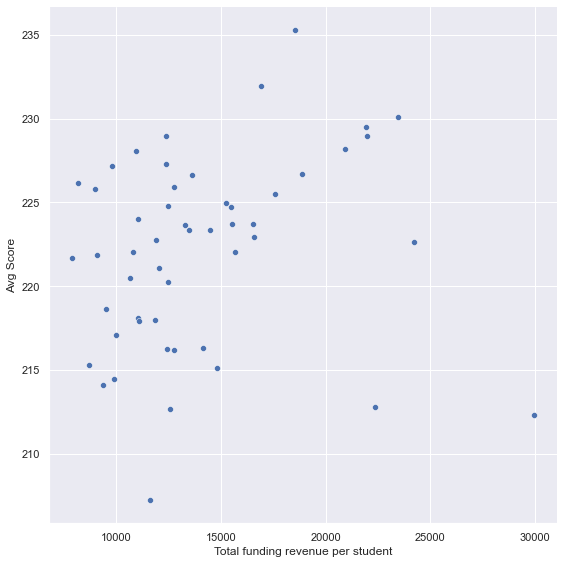

In [15]:
# Total funding received vs 4th grade Reading scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "Total funding revenue per student", y = "Avg Score",
                sizes = (1, 8), data = grade_4_reading, ax = ax)

plt.tight_layout()
plt.savefig("Output_images/Total_Rev_4th_Reading.png")

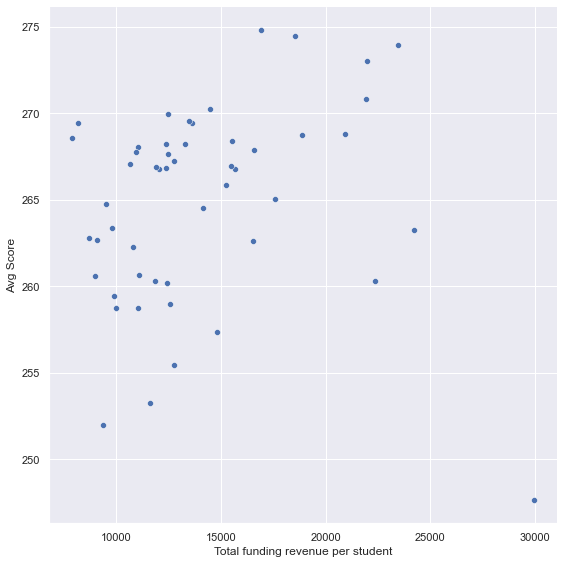

In [16]:
# Total funding received vs 8th grade Reading scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "Total funding revenue per student", y = "Avg Score",
                sizes = (1, 8), data = grade_8_reading, ax = ax)

plt.tight_layout()
plt.savefig("Output_images/Total_Rev_8th_Reading.png")

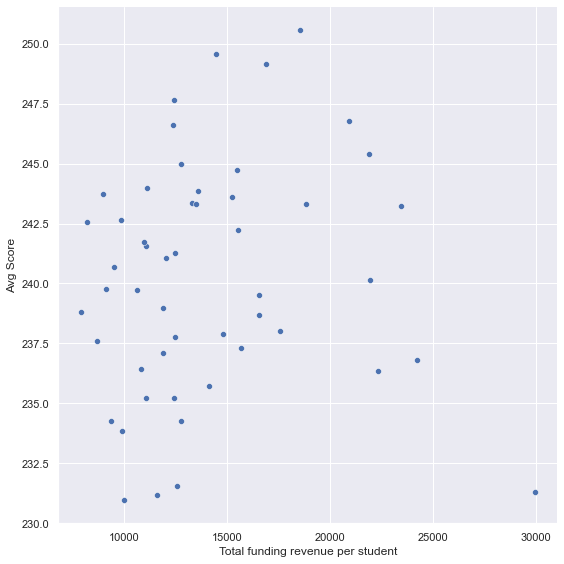

In [17]:
# Total funding received vs 4th grade Math scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "Total funding revenue per student", y = "Avg Score",
                sizes = (1, 8), data = grade_4_math, ax = ax)

plt.tight_layout()
plt.savefig("Output_images/Total_Rev_4th_Math.png")

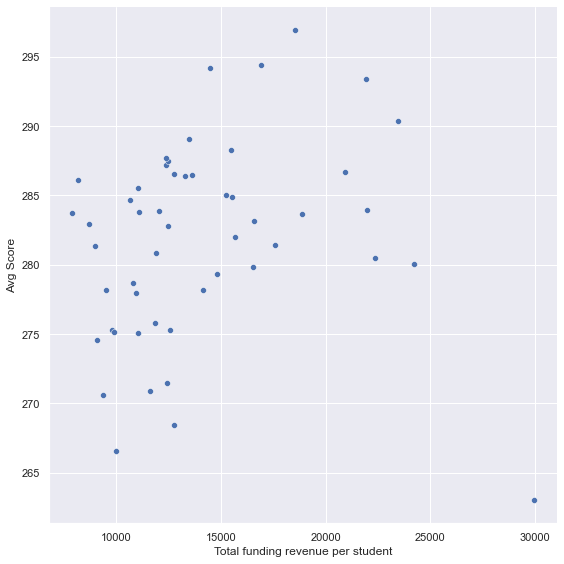

In [18]:
# Total funding received vs 8th grade Math scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "Total funding revenue per student", y = "Avg Score",
                sizes = (1, 8), data = grade_8_math, ax = ax)

plt.tight_layout()
plt.savefig("Output_images/Total_Rev_8th_Math.png")

### Spending vs scores

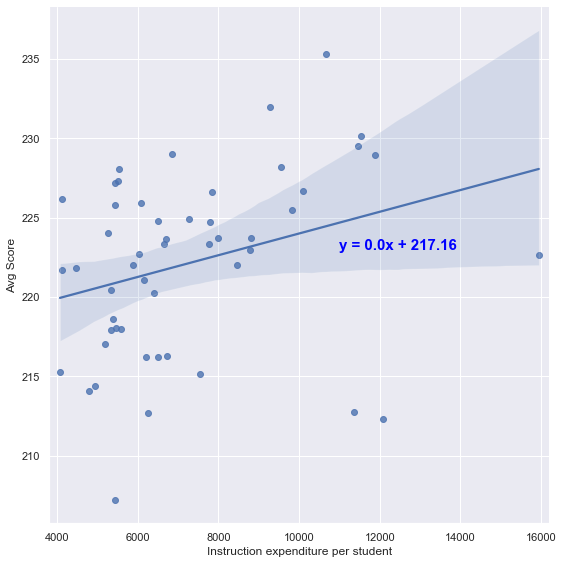

In [19]:
# Linear regression for 4th grade Reading vs Spending per Student
sns.set_theme(color_codes = True)
f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_4_reading["Instruction expenditure per student"],\
                                                               grade_4_reading["Avg Score"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (11000, 223), fontsize = 15, color = 'blue', fontweight = "bold")
ax.set(xlim = (3800, 16200))
       
sns.regplot(data = grade_4_reading, x = "Instruction expenditure per student", y = "Avg Score", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

plt.tight_layout()
plt.savefig("Output_images/Reg_Total_Rev_4th_Read.png")

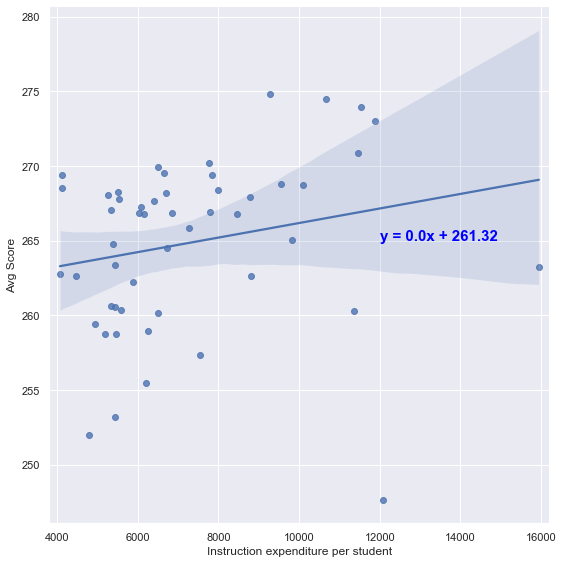

In [20]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)
f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_8_reading["Instruction expenditure per student"],\
                                                               grade_8_reading["Avg Score"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12000, 265), fontsize = 15, color = 'blue', fontweight = "bold")
ax.set(xlim = (3800, 16200))

sns.regplot(data = grade_8_reading, x = "Instruction expenditure per student", y = "Avg Score", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

plt.tight_layout()
plt.savefig("Output_images/Reg_Total_Rev_8th_Read.png")

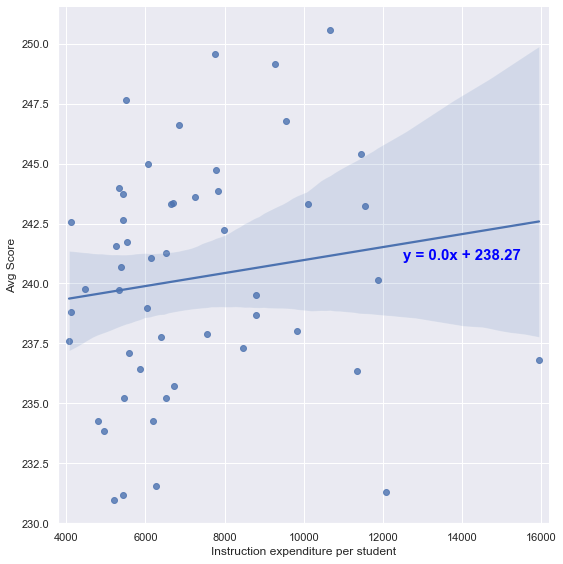

In [21]:
# Linear regression for 4th grade Math vs Spending per Student
sns.set_theme(color_codes = True)
f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_4_math["Instruction expenditure per student"],\
                                                               grade_4_math["Avg Score"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12500, 241), fontsize = 15, color = 'blue', fontweight = "bold")
ax.set(xlim = (3800, 16200))

sns.regplot(data = grade_4_math, x = "Instruction expenditure per student", y = "Avg Score", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

plt.tight_layout()
plt.savefig("Output_images/Reg_Total_Rev_4th_Math.png")

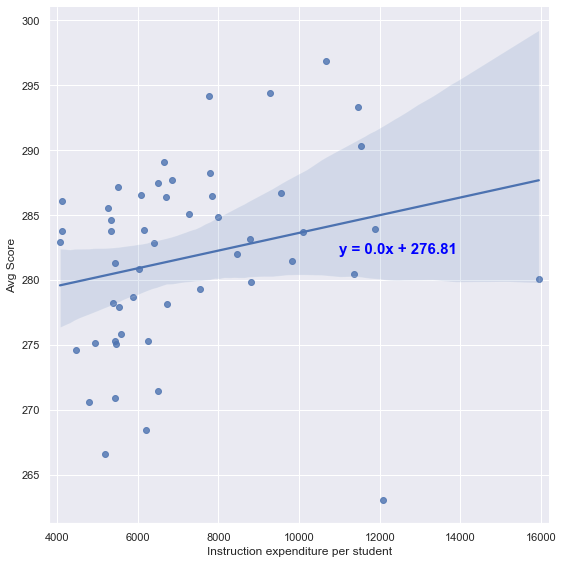

In [22]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)
f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_8_math["Instruction expenditure per student"],\
                                                               grade_8_math["Avg Score"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (11000, 282), fontsize = 15, color = 'blue', fontweight = "bold")
ax.set(xlim = (3800, 16200))

sns.regplot(data = grade_8_math, x = "Instruction expenditure per student", y = "Avg Score", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

plt.tight_layout()
plt.savefig("Output_images/Reg_Total_Rev_8th_Math.png")

### Performing T test

In [23]:
# Performing T test
st.ttest_ind(grade_4_reading["Instruction expenditure per student"], \
             grade_4_reading["Avg Score"], equal_var = False)

Ttest_indResult(statistic=19.94586962163805, pvalue=1.8665156901644947e-25)

In [24]:
# Performing T test
st.ttest_ind(grade_8_reading["Instruction expenditure per student"], \
             grade_8_reading["Avg Score"], equal_var = False)

Ttest_indResult(statistic=19.824758678773964, pvalue=2.447510698911324e-25)

In [25]:
# Performing T test
st.ttest_ind(grade_4_math["Instruction expenditure per student"], \
             grade_4_math["Avg Score"], equal_var = False)

Ttest_indResult(statistic=19.894553164716786, pvalue=2.0935013106894884e-25)

In [26]:
# Performing T test
st.ttest_ind(grade_8_math["Instruction expenditure per student"], \
             grade_8_math["Avg Score"], equal_var = False)

Ttest_indResult(statistic=19.776815447570744, pvalue=2.7251386657249737e-25)

### Data Output

In [27]:
# output file (csv)
grade_8_math.to_csv("Output_Data/clean_math_8.csv", index = False, header = True)
grade_8_reading.to_csv("Output_Data/clean_reading_8.csv", index = False, header = True)
grade_4_math.to_csv("Output_Data/clean_math_4.csv", index = False, header = True)
grade_4_reading.to_csv("Output_Data/clean_reading_4.csv", index = False, header = True)